### Appendix for AD325 Project 3 - N dimensional binary search tree
11/18/2024 Alan M H Beem

In [1]:
# setup
import graphviz
from linear_regression import LinearRegression
from data_tupler import DataTupler
from n_dimensional_tree import NdimBinarySearchTree, N_Node
from binary_search_tree import inorder_traversal

#### N-dimensional binary search tree:

Use case: compact representation of data with outputs of traversals to construct and compare linear regressions with r^2, relatively simple to iterate through key headings and get linear regression for Cartesian product of independent and dependent variables. However, this iteration only works once, repeated re_keying causes lost references.



##### Synthetic Data:

DataTupler generates tuples based on an initial value and a series of functions from one element of the tuple to the next using linear functions and arctan functions.

In [2]:
dt = DataTupler(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k'])
print(dt.get_tuple())

(2.04552840043881, 1.931294583653146, 5.770938040579969, 2.295297715352209, 1.9698631050469764, 3.6607086949726106, 1.9300731188657487, 0.729584010573241, 1.943915173767575, 1.9346500784067207, 2.460770465581625)


Ground truth order of elements in chain of functions in DataTupler instance:

In [3]:
print(dt.function_order_headings)

['h', 'f', 'd', 'a', 'e', 'i', 'j', 'b', 'g', 'c', 'k']


### An 11 dimension tree:

[2.0345297388511274, 1.93112383436413, 5.7708286259818715, 2.2559598342432263, 1.9661870354527742, 3.3593252681712213, 1.9300108739568822, 0.5581298878030896, 1.942614299728005, 1.9341804628713037, 2.460764903402928]


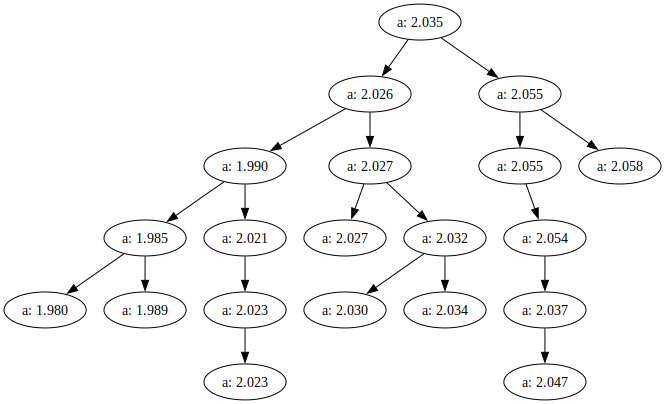

In [4]:
ndim_tree = NdimBinarySearchTree(dt.headings)
for _ in range(20):
    a_tuple = dt.get_tuple()
    a_node = N_Node(a_tuple[0], dt.headings, list(a_tuple))
    a_node.key_heading = dt.headings[0]
    ndim_tree.insert(a_node)
print(ndim_tree.root.value)
ndim_tree.visualize_tree()

#### Comparing linear fits and r^2:

##### NdimBinarySearchTree.re_key(heading) is used to iterate through sorted (inorder) values 

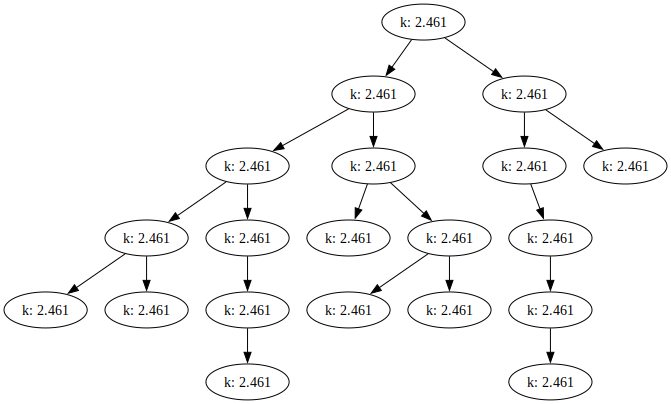

In [5]:
import matplotlib.pyplot as plt


m_matrix = [[1 for i in dt.headings] for j in dt.headings]
b_matrix = [[0 for i in dt.headings] for i in dt.headings]
r_2_matrix = [[1 for i in dt.headings] for j in dt.headings]
linear_matrix = [[1 for i in dt.headings] for j in dt.headings]
for h_i, i in zip(dt.headings, range(len(dt.headings))):
    if i != 0:
        ndim_tree.re_key(h_i)
    for h_j, j in zip(dt.headings, range(len(dt.headings))):
        nodes = inorder_traversal(ndim_tree.root)
        x = []
        y = []
        for each in nodes:
            x.append(each.get_value(h_i))
            y.append(each.get_value(h_j))
        linear = LinearRegression(x, y)
        # print(linear.m)
        m_matrix[i][j] = linear.m
        r_2_matrix[i][j] = linear.r_2
        linear_matrix[i][j] = linear
ndim_tree.visualize_tree()

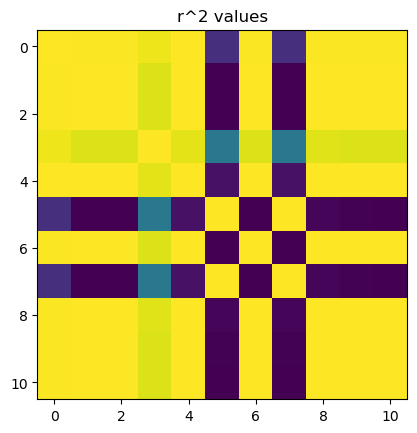

In [6]:
plt.figure()
plt.title('r^2 values')
plt.imshow(r_2_matrix)
plt.show()

##### LinearRegression.\_\_call\_\_ evaluates argument plot_x[k] to display subset of linear regressions, with shared axes

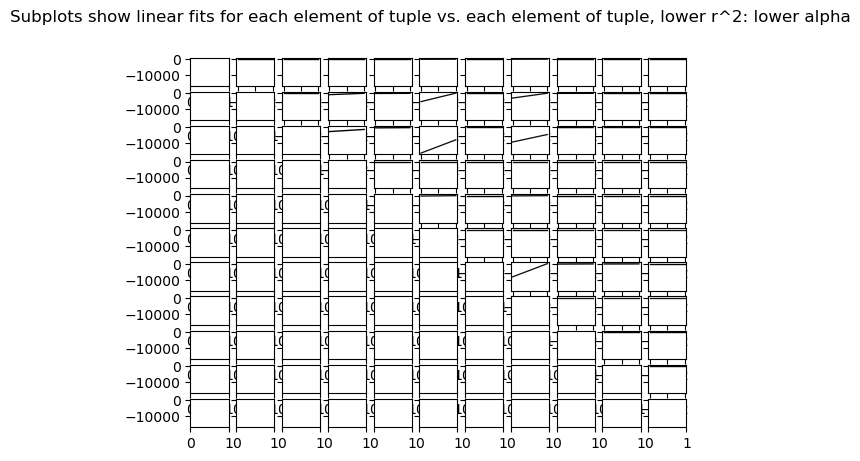

In [7]:
fig, axs = plt.subplots(len(dt.headings), len(dt.headings), sharey=True)
fig.suptitle('Subplots show linear fits for each element of tuple vs. each element of tuple, lower r^2: lower alpha')
for ax_row, i in zip(axs, range(len(axs))):
    for ax_col, j in zip(axs, range(i + 1, len(axs[i]))):
        plot_x = list(range(-200, 201, 1))
        for p_x in range(len(plot_x)):
            plot_x[p_x] /= 100
        axs[i][j].plot(plot_x, [linear_matrix[i][j](plot_x[k]) for k in range(len(plot_x))], color='k', alpha=max(r_2_matrix[i][j]**2, 0.4), linewidth=r_2_matrix[i][j])
plt.show()

##### LinearRegression.\_\_call\_\_ evaluates argument plot_x[k] to display linear regressions, with shared axes

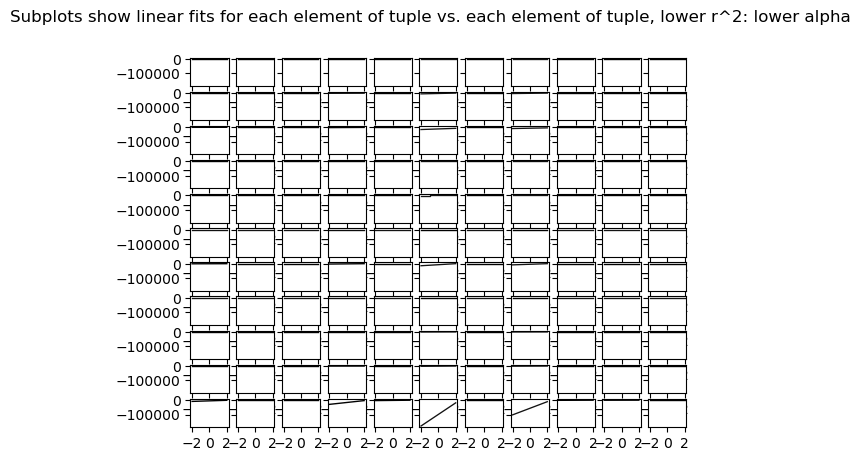

In [8]:
fig, axs = plt.subplots(len(dt.headings), len(dt.headings), sharey=True)
fig.suptitle('Subplots show linear fits for each element of tuple vs. each element of tuple, lower r^2: lower alpha')
for ax_row, i in zip(axs, range(len(axs))):
    for ax_col, j in zip(axs, range(len(axs[i]))):  # i + 1, 
        plot_x = list(range(-200, 201, 1))
        for p_x in range(len(plot_x)):
            plot_x[p_x] /= 100
        axs[i][j].plot(plot_x, [linear_matrix[i][j](plot_x[k]) for k in range(len(plot_x))], color='k', alpha=max(r_2_matrix[i][j]**2, 0.4), linewidth=r_2_matrix[i][j])
plt.show()

##### Text output of y=mx+b for each of i x j for i,j in index(tuple)

Each column represents the linear fit of each heading on the listed heading (ex: b vs. a appears in the entry below a)

In [9]:
for m_row, b_row in zip(m_matrix, b_matrix):
    line = ''
    for m, b in zip(m_row, b_row):
        line += f"y={m:4.3e}x+{b:.8f} \t" if m_row.index(m) != m_matrix.index(m_row) else f"{dt.headings[m_row.index(m)]}\t\t\t\t"
    print(line)

a				y=1.592e-02x+0.00000000 	y=1.021e-02x+0.00000000 	y=3.395e+00x+0.00000000 	y=3.399e-01x+0.00000000 	y=2.101e+01x+0.00000000 	y=5.807e-03x+0.00000000 	y=1.195e+01x+0.00000000 	y=1.210e-01x+0.00000000 	y=4.376e-02x+0.00000000 	y=5.189e-04x+0.00000000 	
y=6.278e+01x+0.00000000 	b				y=6.410e-01x+0.00000000 	y=2.130e+02x+0.00000000 	y=2.134e+01x+0.00000000 	y=1.316e+03x+0.00000000 	y=3.646e-01x+0.00000000 	y=7.485e+02x+0.00000000 	y=7.597e+00x+0.00000000 	y=2.748e+00x+0.00000000 	y=3.259e-02x+0.00000000 	
y=9.795e+01x+0.00000000 	y=1.560e+00x+0.00000000 	c				y=3.323e+02x+0.00000000 	y=3.330e+01x+0.00000000 	y=2.053e+03x+0.00000000 	y=5.689e-01x+0.00000000 	y=1.168e+03x+0.00000000 	y=1.185e+01x+0.00000000 	y=4.288e+00x+0.00000000 	y=5.084e-02x+0.00000000 	
y=2.943e-01x+0.00000000 	y=4.685e-03x+0.00000000 	y=3.003e-03x+0.00000000 	d				y=1.000e-01x+0.00000000 	y=6.219e+00x+0.00000000 	y=1.708e-03x+0.00000000 	y=3.538e+00x+0.00000000 	y=3.559e-02x+0.00000000 	y=1.287e-02x+0.00000000 	y=

In [10]:
print('actual order of tuple elements for data generation function')
print(dt.function_order_headings)

actual order of tuple elements for data generation function
['h', 'f', 'd', 'a', 'e', 'i', 'j', 'b', 'g', 'c', 'k']


##### Without noise, if all functions are positive, the trees have the same shape

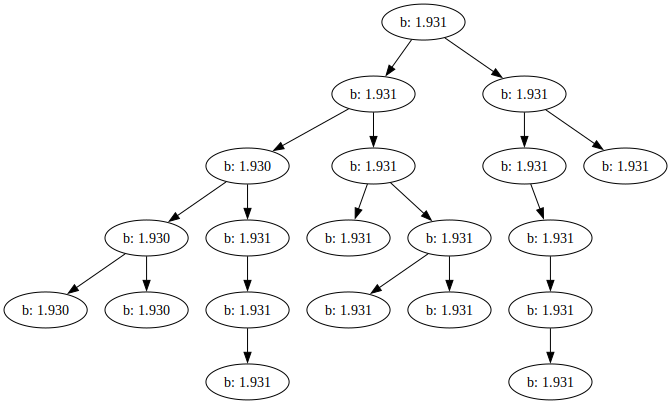

In [11]:
ndim_tree.re_key(dt.headings[1])
ndim_tree.visualize_tree()

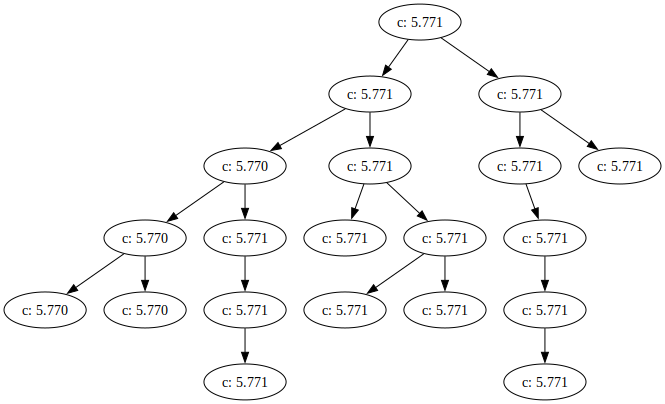

In [12]:
ndim_tree.re_key(dt.headings[2])
ndim_tree.visualize_tree()

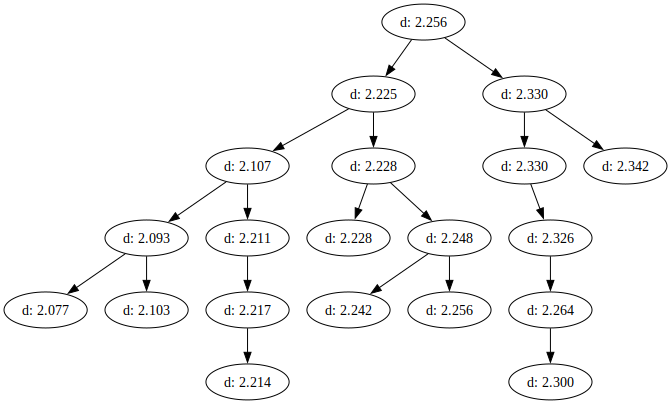

In [13]:
ndim_tree.re_key(dt.headings[3])
ndim_tree.visualize_tree()

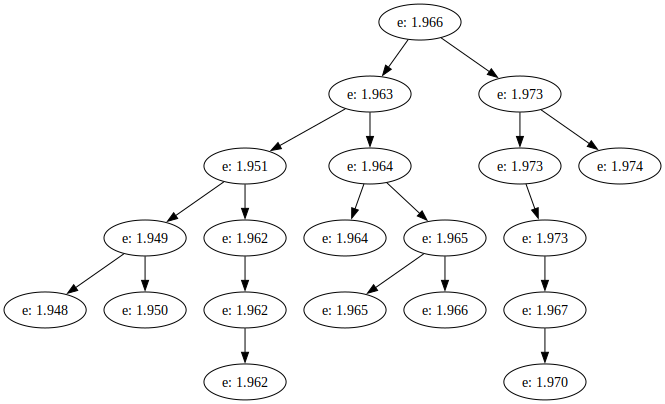

In [14]:
ndim_tree.re_key(dt.headings[4])
ndim_tree.visualize_tree()

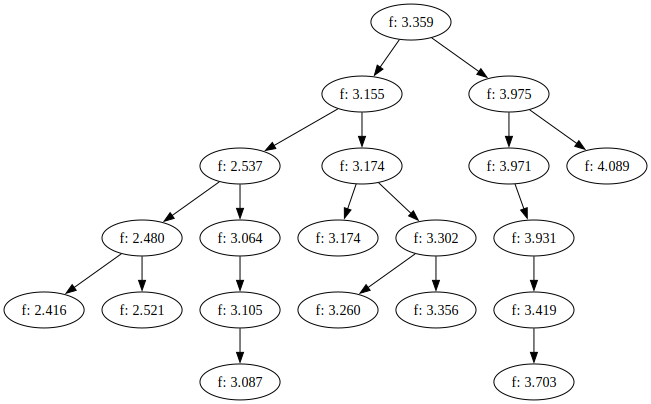

In [15]:
ndim_tree.re_key(dt.headings[5])
ndim_tree.visualize_tree()

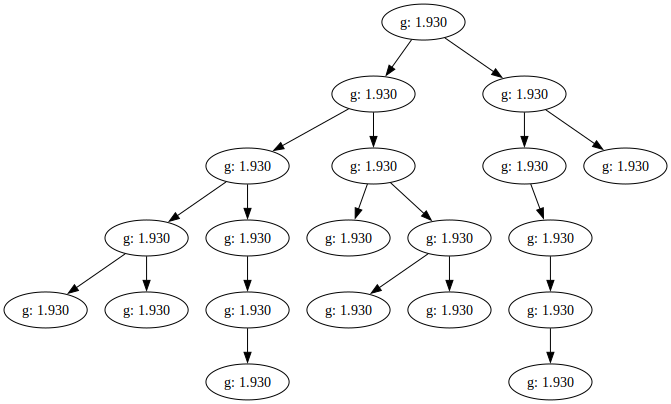

In [16]:
ndim_tree.re_key(dt.headings[6])
ndim_tree.visualize_tree()

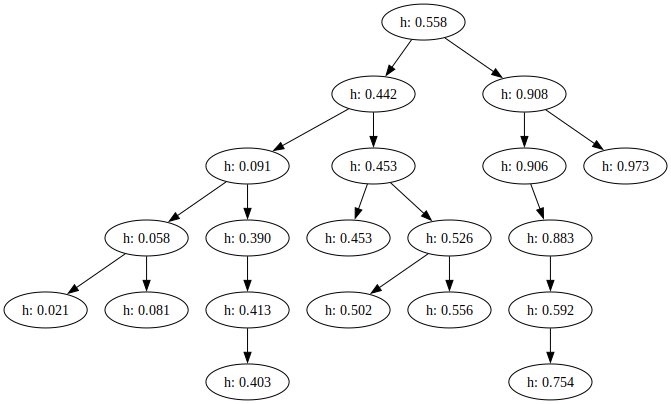

In [17]:
ndim_tree.re_key(dt.headings[7])
ndim_tree.visualize_tree()

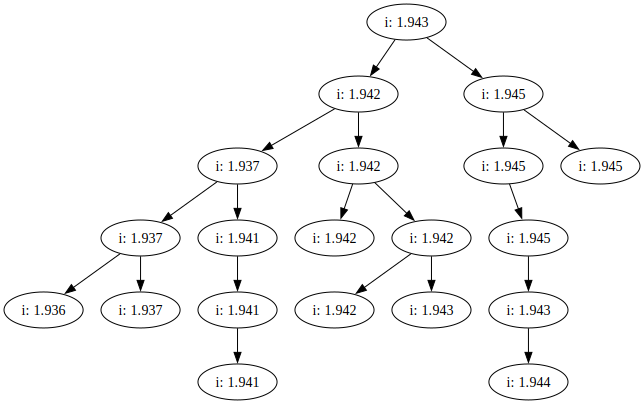

In [18]:
ndim_tree.re_key(dt.headings[8])
ndim_tree.visualize_tree()

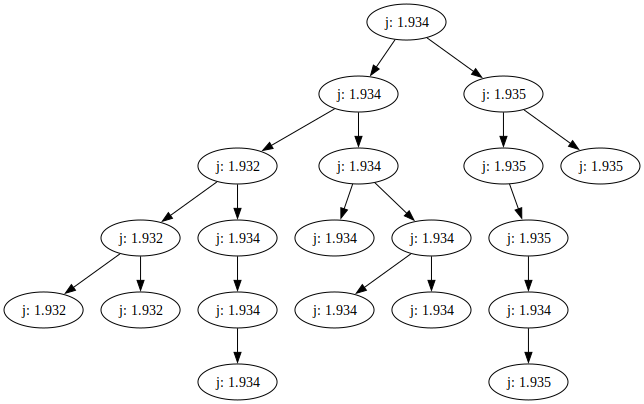

In [19]:
ndim_tree.re_key(dt.headings[9])
ndim_tree.visualize_tree()

### Re-keying is not working for last heading

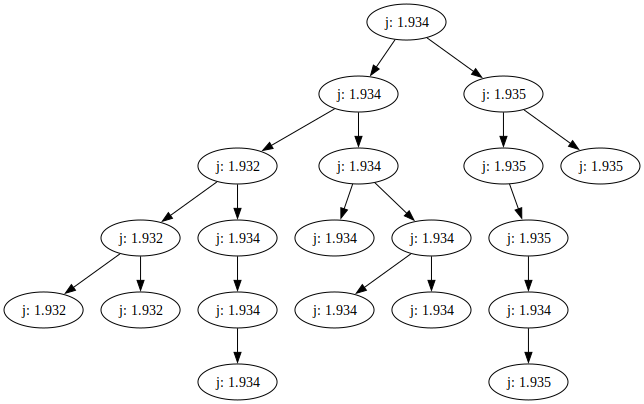

In [20]:
ndim_tree.re_key(dt.headings[10])
ndim_tree.visualize_tree()

k


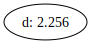

In [21]:
print(dt.headings[10])
ndim_tree.re_key(dt.headings[0])
ndim_tree.re_key(dt.headings[9])
ndim_tree.re_key(dt.headings[0])
ndim_tree.re_key(dt.headings[9])
ndim_tree.re_key(dt.headings[2])
ndim_tree.visualize_tree()

##### Testing remove: // Not working

In [22]:
# print(ndim_tree.root.value)
# ndim_tree.remove(ndim_tree.root.value)
# ndim_tree.visualize_tree()